In [1]:
!pip install tensorflow matplotlib


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


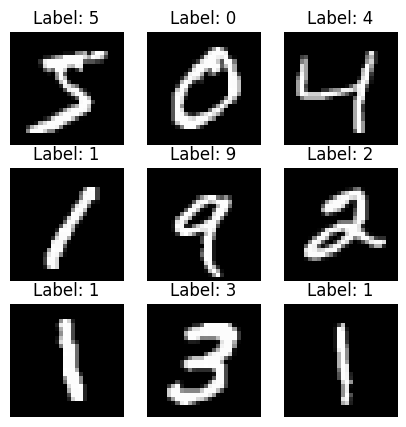

In [5]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Shapes of datasets
print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)

# Display some sample digits
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [6]:
# Scale pixel values 0-255 → 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check one-hot example
print("First label one-hot:", y_train[0])


First label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,  # 20% for validation
    epochs=10,             # Number of passes through data
    batch_size=32          # Number of samples per gradient update
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9216 - loss: 0.2691 - val_accuracy: 0.9522 - val_loss: 0.1612
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9653 - loss: 0.1132 - val_accuracy: 0.9669 - val_loss: 0.1139
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9757 - loss: 0.0786 - val_accuracy: 0.9688 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9819 - loss: 0.0580 - val_accuracy: 0.9693 - val_loss: 0.1087
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9854 - loss: 0.0457 - val_accuracy: 0.9735 - val_loss: 0.0915
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9884 - loss: 0.0361 - val_accuracy: 0.9728 - val_loss: 0.1004
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9719 - val_loss: 0.1049
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9920 - loss: 0.023

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.1006
Test Accuracy: 0.9756


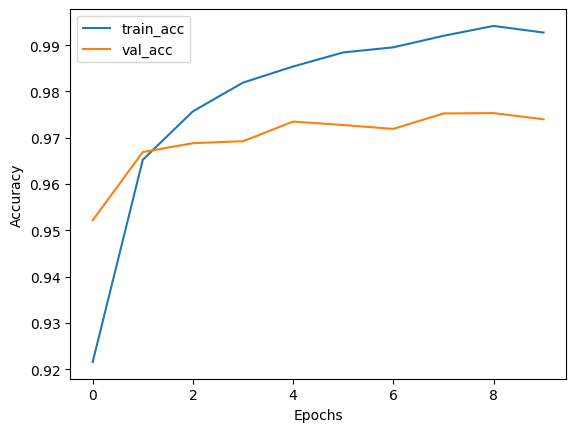

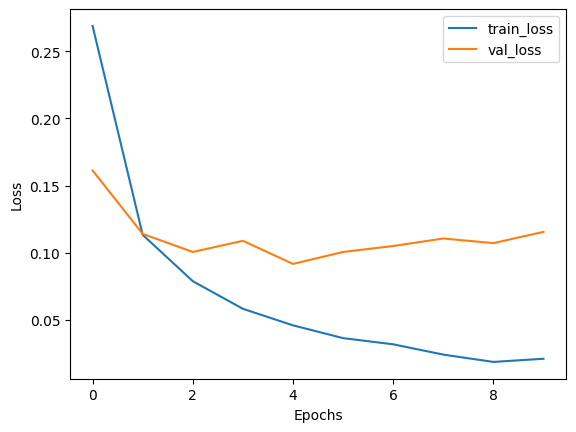

In [10]:
# Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
# Save in native Keras format
model.save("mnist_model.keras")
print("Model saved successfully in Keras native format!")



Model saved successfully in Keras native format!
